In [40]:
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("Data/train_feasel.csv")
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


# Variance Thresholding

In [41]:
from sklearn.feature_selection import VarianceThreshold
vart=VarianceThreshold(threshold=0)
vart.fit(df)


VarianceThreshold(threshold=0)

In [42]:
vart.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [43]:
df.columns[vart.get_support()]

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=337)

# Feature selection using correlation

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
x_train.shape, x_test.shape

((53214, 370), (22806, 370))

In [47]:
x_train.corr()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
var3,1.000000,-0.003769,0.001790,0.005309,0.006322,0.001540,0.001697,0.000536,0.000632,0.001301,...,0.000738,0.000553,0.000732,0.000770,0.000642,0.000465,0.000769,0.000805,0.000140,0.005672
var15,-0.003769,1.000000,0.042432,0.095696,0.101386,0.042572,0.045842,0.008120,0.009172,0.033432,...,0.027528,0.018402,0.028426,0.029238,0.031925,0.019212,0.034742,0.034995,0.004416,0.099938
imp_ent_var16_ult1,0.001790,0.042432,1.000000,0.042590,0.035779,0.013211,0.012599,-0.000342,0.000678,0.014719,...,-0.000910,-0.000684,-0.000888,-0.000931,0.003087,-0.000595,0.006117,0.008007,-0.000348,-0.001677
imp_op_var39_comer_ult1,0.005309,0.095696,0.042590,1.000000,0.889181,0.353187,0.304416,0.029921,0.051720,0.246994,...,0.023219,0.019279,0.018805,0.020868,0.010844,0.008638,0.013411,0.012702,0.009369,0.008450
imp_op_var39_comer_ult3,0.006322,0.101386,0.035779,0.889181,1.000000,0.323463,0.359130,0.025863,0.053657,0.239022,...,0.040765,0.035498,0.032185,0.035582,0.009269,0.007333,0.012048,0.011334,0.011030,0.002415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
saldo_medio_var44_hace3,0.000465,0.019212,-0.000595,0.008638,0.007333,-0.000430,-0.000469,-0.000152,-0.000179,-0.000365,...,-0.000197,-0.000148,-0.000196,-0.000206,0.325992,1.000000,0.243201,0.218338,0.001874,-0.002294
saldo_medio_var44_ult1,0.000769,0.034742,0.006117,0.013411,0.012048,-0.000168,-0.000447,-0.000257,-0.000302,-0.000180,...,-0.000332,-0.000250,-0.000331,-0.000347,0.821524,0.243201,1.000000,0.968123,0.003435,-0.003711
saldo_medio_var44_ult3,0.000805,0.034995,0.008007,0.012702,0.011334,-0.000296,-0.000542,-0.000269,-0.000316,-0.000282,...,-0.000348,-0.000262,-0.000346,-0.000364,0.711449,0.218338,0.968123,1.000000,0.003031,-0.003820
var38,0.000140,0.004416,-0.000348,0.009369,0.011030,0.007469,0.009783,-0.000493,0.000514,0.003672,...,0.004198,0.001489,0.004385,0.004383,0.002998,0.001874,0.003435,0.003031,1.000000,-0.017527


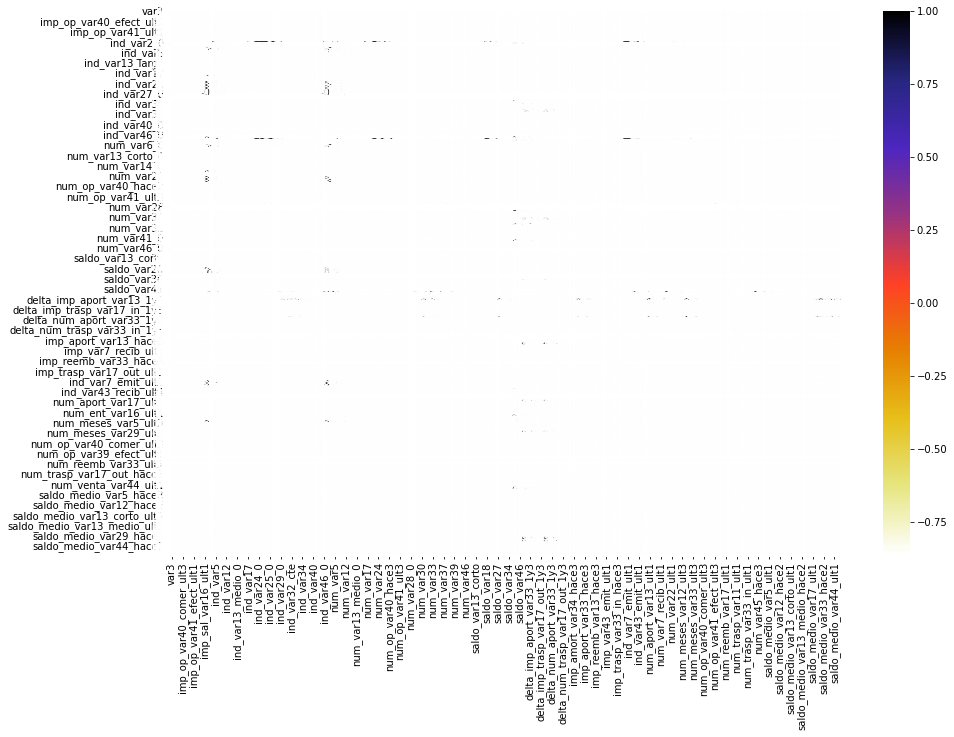

In [68]:
import seaborn as sns
plt.figure(figsize=(15,10))
cor=x_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [50]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr   

In [52]:
corr_f=correlation(x_train,0.7)
len(set(corr_f))

232

In [53]:
corr_f

{'delta_imp_amort_var18_1y3',
 'delta_imp_amort_var34_1y3',
 'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_aport_var33_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_reemb_var17_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var17_out_1y3',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_trasp_var33_out_1y3',
 'delta_num_venta_var44_1y3',
 'imp_amort_var18_ult1',
 'imp_amort_var34_ult1',
 'imp_aport_var13_ult1',
 'imp_aport_var33_hace3',
 'imp_op_var39_comer_ult3',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_op_var40_comer_ult3',
 'imp_op_var40_efect_ult3',
 'imp_op_var41_comer_ult1',
 'imp_op_var41_comer_ult3',
 'imp_op_var41_efect_ult3',
 'imp_op_var41_ult1',
 'imp_reemb_var13_ult1',
 'imp_reemb_var17_ult1',
 'imp_trans_var37_ult1',
 'imp_trasp_var17_in_ult1',
 'imp_trasp_var17_out_ult1',
 'imp_trasp_var33_in_ult1',
 'imp_trasp_var33_out_ult1',
 'imp_venta_var44_hace3',
 'imp_venta

In [54]:
x_train.drop(corr_f,axis=1)
x_test.drop(corr_f,axis=1)

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var40_comer_ult1,imp_op_var40_efect_ult1,imp_op_var40_ult1,imp_op_var41_efect_ult1,imp_sal_var16_ult1,ind_var1_0,...,saldo_medio_var13_corto_hace3,saldo_medio_var13_largo_hace3,saldo_medio_var13_medio_hace3,saldo_medio_var17_hace3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var33_hace3,saldo_medio_var44_hace3,var38,TARGET
36443,2,23,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,94804.740000,0
17577,2,23,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,119861.310000,0
28097,2,44,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
34967,2,24,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,51001.260000,0
50314,2,80,0.0,0.00,0.0,0.0,0.0,900.0,0.0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,93676.230000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49159,2,40,0.0,1086.00,0.0,0.0,0.0,17490.0,0.0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,94645.140000,0
38812,2,43,0.0,552.30,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,47228.970000,0
60399,2,23,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,155925.360000,0
40783,2,31,0.0,426.18,0.0,0.0,0.0,0.0,0.0,1,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,149280.450000,0


# Chi-Square Test

In [55]:
import pandas as pd

In [56]:
df2=pd.read_csv("Data/ml book2.csv")
df2

,Day,Outlook,temp,humidity,windy,play
0,1,sunny,hot,high,False,NO
1,2,sunny,hot,high,True,NO
2,3,Overcast,hot,high,False,YES
3,4,rainy,mild,high,False,YES
4,5,rainy,cold,Normal,False,YES
5,6,rainy,cold,Normal,True,NO
6,7,overcast,cold,Normal,True,YES
7,8,sunny,mild,high,False,NO
8,9,sunny,cold,normal,False,YES
9,10,rainy,mild,normal,False,YES


In [57]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Day       14 non-null     int64 
 1   Outlook   14 non-null     object
 2   temp      14 non-null     object
 3   humidity  14 non-null     object
 4   windy     14 non-null     bool  
 5   play      14 non-null     object
dtypes: bool(1), int64(1), object(4)
memory usage: 702.0+ bytes


In [58]:

df2=df2[['Day','Outlook','temp','humidity','windy','play']]
df2.head()

,Day,Outlook,temp,humidity,windy,play
0,1,sunny,hot,high,False,NO
1,2,sunny,hot,high,True,NO
2,3,Overcast,hot,high,False,YES
3,4,rainy,mild,high,False,YES
4,5,rainy,cold,Normal,False,YES


In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
le = LabelEncoder()

In [61]:
df2['Outlook']=le.fit_transform(df2['Outlook'])
df2['temp'] = le.fit_transform(df2['temp'])
df2['humidity']=le.fit_transform(df2['humidity'])
df2['windy'] = le.fit_transform(df2['windy'])
df2['play'] = le.fit_transform(df2['play'])

In [62]:
df2

,Day,Outlook,temp,humidity,windy,play
0,1,3,1,1,0,0
1,2,3,1,1,1,0
2,3,0,1,1,0,1
3,4,2,2,1,0,1
4,5,2,0,0,0,1
5,6,2,0,0,1,0
6,7,1,0,0,1,1
7,8,3,2,1,0,0
8,9,3,0,2,0,1
9,10,2,2,2,0,1


In [63]:
x = df2.iloc[:,:-1]
y= df2.iloc[:,-1]

In [64]:
## Perform chi2 test
### chi2 returns 2 values
### Fscore and the pvalue
from sklearn.feature_selection import chi2
f_p_values=chi2(x,y)

In [65]:
f_p_values

(array([1.75259259, 1.4       , 0.02222222, 0.53481481, 0.53333333]),
 array([0.18555114, 0.23672357, 0.88149745, 0.46458962, 0.46520882]))

In [66]:
import pandas as pd
p_values=pd.Series(f_p_values[0])
p_values.index=x.columns
p_values

Day         1.752593
Outlook     1.400000
temp        0.022222
humidity    0.534815
windy       0.533333
dtype: float64

In [67]:
p_values.sort_index(ascending=False)

windy       0.533333
temp        0.022222
humidity    0.534815
Outlook     1.400000
Day         1.752593
dtype: float64